PLA Weights: [840.          27.91299659 -81.92813857]
Regression Weights: [ 1.15167377  0.01020482 -0.07823629]


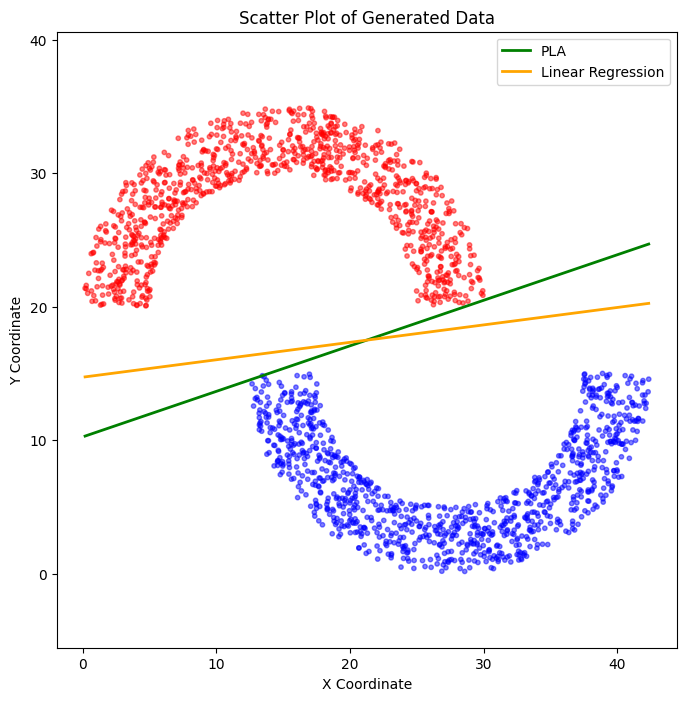

In [11]:
import random
import numpy as np
import matplotlib.pyplot as plt

def generate_data(size):

    # Generate polor coordinates
    r = np.random.uniform(10, 15, size)

    theta = np.random.uniform(0, 2*np.pi, size)
    
    # Filter out values that are not between 0 and 2pi
    mask = ~np.isin(theta, [0, np.pi, 2*np.pi])
    while not np.all(mask):
        replacement = np.random.uniform(0, 2*np.pi, (~mask).sum())
        theta[~mask] = replacement
        mask = ~np.isin(theta, [0, np.pi, 2*np.pi])

    return r, theta

def convert_to_xy(r, theta):
    
    # Convert polar coordinates to cartesian
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    # Shift coordinates based on semicircle
    mask = y < 0
    x[mask] += 27.5
    y[mask] += 15
    x[~mask] += 15
    y[~mask] += 20

    # Generate labels
    truth = np.where(mask, 1, -1)

    return x, y, truth

def PLA(x, y, truth):
    weights = np.zeros(3, dtype=float)
    X = np.column_stack((np.ones(len(x)), x, y))
    iteration = 0
    max_iterations = 10000
    while iteration < max_iterations:
        
        predictions = np.sign(X @ weights)
        misclassified = predictions != truth

        if not np.any(misclassified):
            break

        # Updates weights
        misclassified_idx = np.where(misclassified)[0][0]
        weights += X[misclassified_idx] * truth[misclassified_idx]
        
        iteration += 1

    return weights

def regression(x_coords, y_coords, truth):

    X = np.column_stack((np.ones(len(x_coords)), x_coords, y_coords))
    y = truth

    X_psuedo_inv = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T)
    weights = np.dot(X_psuedo_inv, y)

    return weights

if __name__ == '__main__':
    
    # Number of data points
    size = 2000

    r, theta = generate_data(size)
    x, y, truth = convert_to_xy(r, theta)
    
    PLA_weights = PLA(x, y, truth)
    regression_weights = regression(x, y, truth)

    # Print Results
    print("PLA Weights:", PLA_weights)
    print("Regression Weights:", regression_weights)

    colors = ['blue' if yi < 17.5 else 'red' for yi in y]
    plt.figure(figsize=(8, 8))
    plt.scatter(x, y, c=colors, alpha=0.5, s=10)

    # PLA Result
    x_boundary = np.linspace(min(x), max(x), 100)
    y_boundary = -(PLA_weights[1] / PLA_weights[2]) * x_boundary - (PLA_weights[0] / PLA_weights[2])
    plt.plot(x_boundary, y_boundary, color='green', linewidth=2, label='PLA')
    
    # Regression Result
    y_boundary_reg = -(regression_weights[1] / regression_weights[2]) * x_boundary - (regression_weights[0] / regression_weights[2])
    plt.plot(x_boundary, y_boundary_reg, color='orange', linewidth=2, label='Linear Regression')

    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend(loc='upper right')
    plt.title("Scatter Plot of Generated Data")
    plt.axis('equal')
    plt.show()

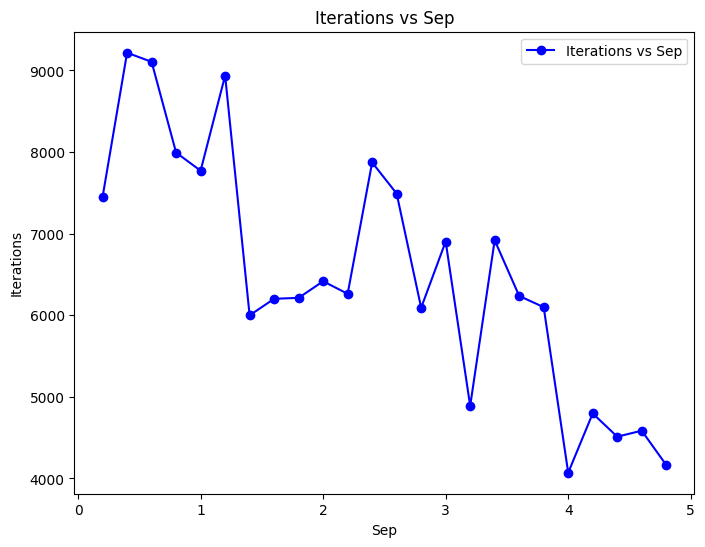

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(size):

    # Generate polor coordinates
    r = np.random.uniform(10, 15, size)

    theta = np.random.uniform(0, 2*np.pi, size)
    
    # Fileter out values that are not between 0 and 2pi
    mask = ~np.isin(theta, [0, np.pi, 2*np.pi])
    while not np.all(mask):
        replacement = np.random.uniform(0, 2*np.pi, (~mask).sum())
        theta[~mask] = replacement
        mask = ~np.isin(theta, [0, np.pi, 2*np.pi])

    return r, theta

def convert_to_xy(r, theta, sep):
    
    # Convert polar coordinates to cartesian
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    # Shift coordinates based on semicircle
    mask = y < 0
    x[mask] += 27.5
    y[mask] += 15
    x[~mask] += 15
    y[~mask] += 15 + sep

    # Generate labels
    truth = np.where(mask, 1, -1)

    return x, y, truth

def PLA(x, y, truth):
    weights = np.zeros(3, dtype=float)
    X = np.column_stack((np.ones(len(x)), x, y))
    iteration = 0
    max_iterations = 10000
    while iteration < max_iterations:
        
        predictions = np.sign(X @ weights)
        misclassified = predictions != truth

        if not np.any(misclassified):
            break

        # Updates weights
        misclassified_idx = np.where(misclassified)[0][0]
        weights += X[misclassified_idx] * truth[misclassified_idx]
        
        iteration += 1

    return iteration

if __name__ == '__main__':
    
    sep = .2
    sep_values = []
    iteration_values = []
    while sep <= 5:

        # Take average of iterations to eliminate noise
        avg_iteration = 0
        for i in range(10):
        # Number of data points
            size = 2000

            r, theta = generate_data(size)
            x, y, truth = convert_to_xy(r, theta, sep)
            
            avg_iteration += PLA(x, y, truth)

        sep_values.append(sep)
        iteration_values.append(avg_iteration / 10)

        sep += .2
    
    # Print results
    plt.figure(figsize=(8, 6))
    plt.plot(sep_values, iteration_values, marker='o', linestyle='-', color='blue', label='Iterations vs Sep')
    plt.xlabel("Sep")
    plt.ylabel("Iterations")
    plt.title("Iterations vs Sep")
    plt.legend()
    plt.show()